In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the concatenated dataset
data_path = './model_testing/cleaned_concatenated_with_host_status.csv'
df = pd.read_csv(data_path)

# Sort the data by Year to preserve the time-series nature
df.sort_values(by='Year', inplace=True)

# Create the 'Previous_Total_Medal_Count' feature by shifting the 'Total_Medal_Count' column
df['Previous_Total_Medal_Count'] = df.groupby('NOC')['Total_Medal_Count'].shift(1)

# Drop rows where 'Previous_Total_Medal_Count' is NaN (e.g., the first year for each NOC)
df.dropna(subset=['Previous_Total_Medal_Count'], inplace=True)

# Split the data into training (first 80%) and testing (last 20%)
split_index = int(len(df) * 0.8)
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

# Define features and target
features = ['Total_Athletes', 'Previous_Total_Medal_Count', 'host_status']
X_train = train_df[features]
y_train = train_df['Total_Medal_Count']
X_test = test_df[features]
y_test = test_df['Total_Medal_Count']

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Display first few predictions alongside actual values
test_df['Predicted_Total_Medal_Count'] = y_pred
test_df[['Year', 'NOC', 'Total_Medal_Count', 'Predicted_Total_Medal_Count']].head()


Mean Squared Error: 22.02
R-squared: 0.86


/tmp/ipykernel_39180/2472990420.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Predicted_Total_Medal_Count'] = y_pred


,Year,NOC,Total_Medal_Count,Predicted_Total_Medal_Count
5483,2004,Mozambique,0,0.568196
5484,2004,Myanmar,0,-0.013946
5485,2004,Namibia,0,0.279972
5486,2004,Nauru,0,0.035041
5487,2004,Nepal,0,0.182000


/tmp/ipykernel_39180/3331943377.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Predicted_Total_Medal_Count'] = y_pred


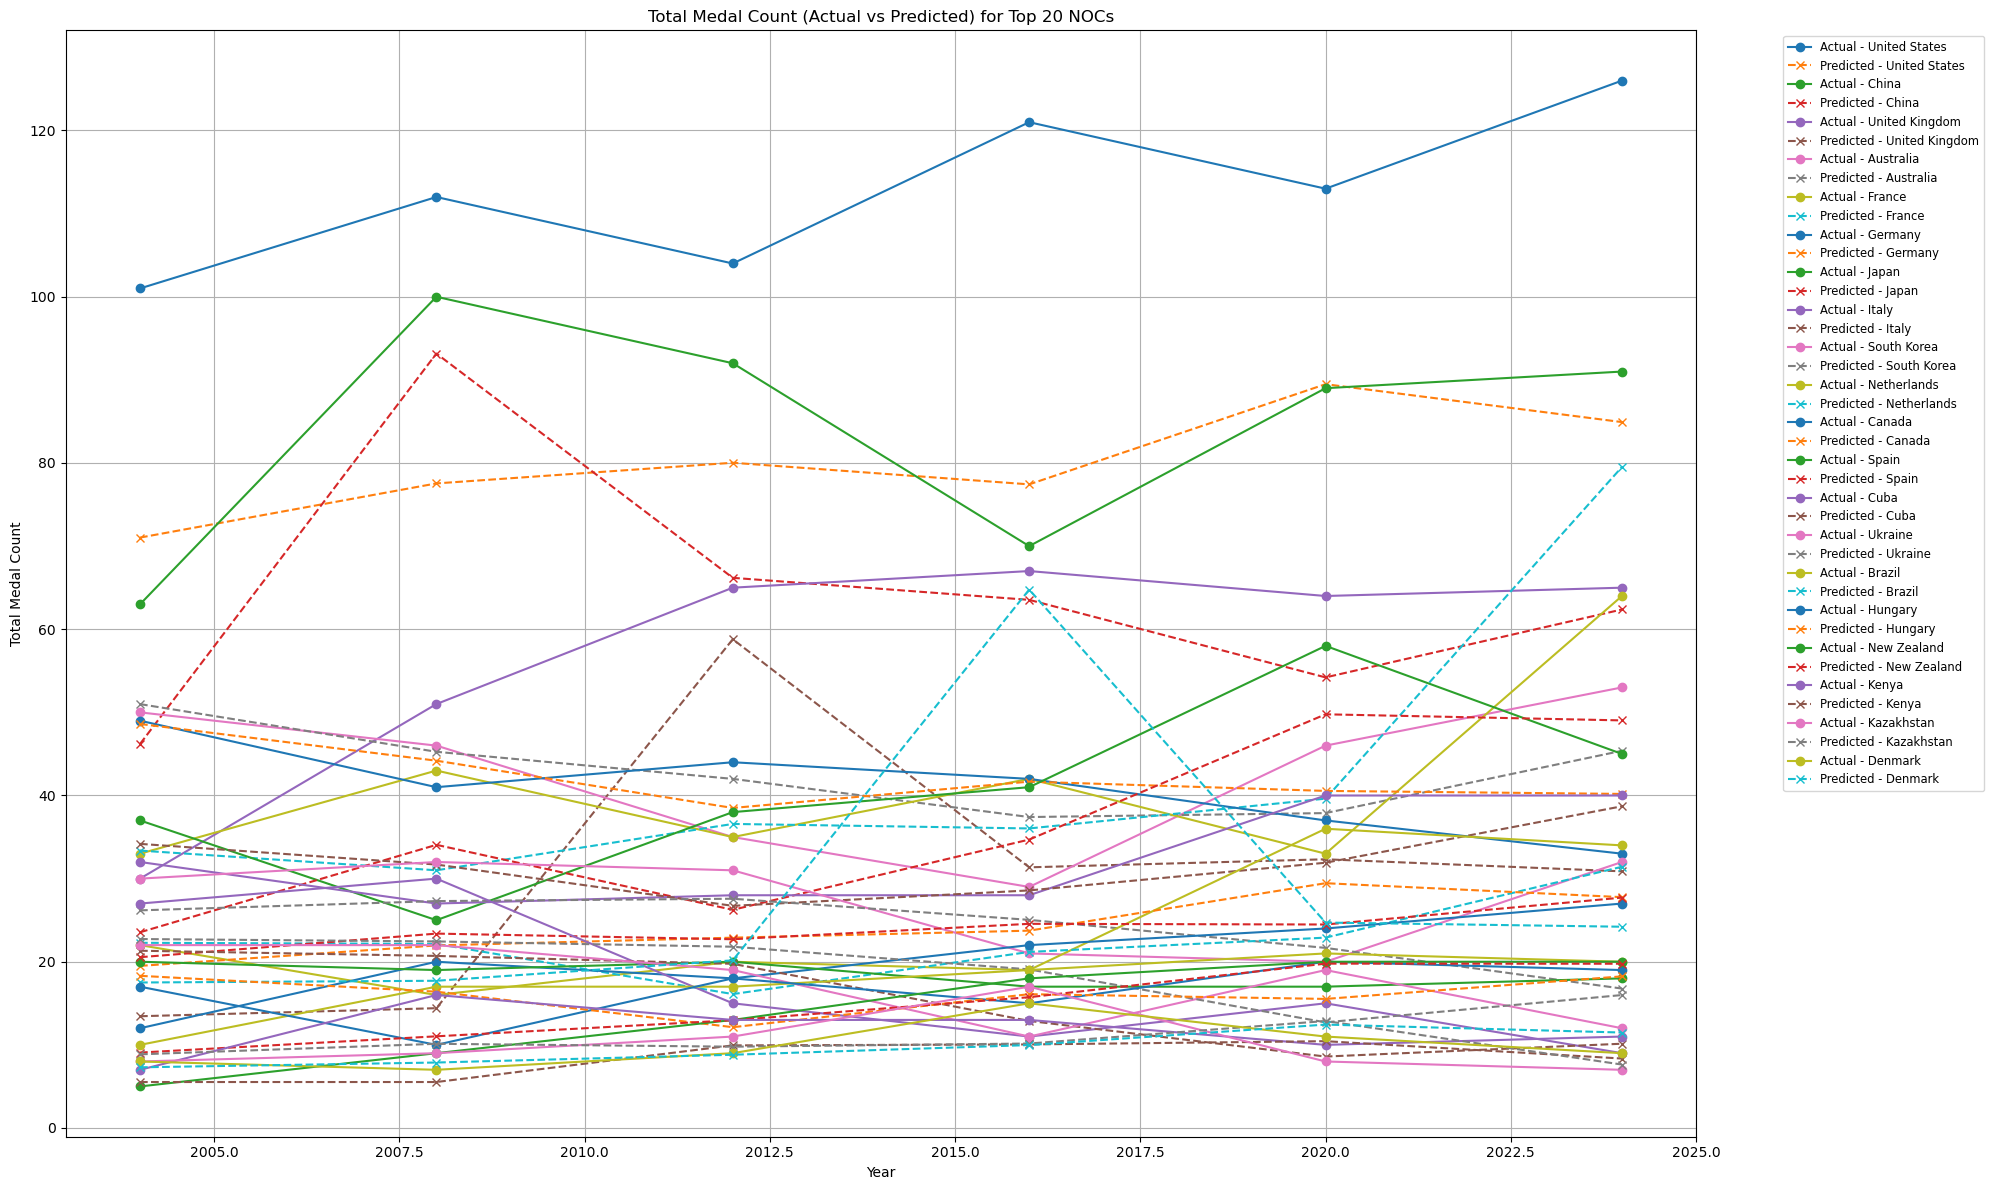

In [6]:
import matplotlib.pyplot as plt

# Ensure test_df has predictions and relevant columns
test_df['Predicted_Total_Medal_Count'] = y_pred

# Calculate total medal count per NOC
noc_medal_counts = test_df.groupby('NOC')['Total_Medal_Count'].sum().reset_index()

# Sort NOCs by medal count in descending order (top 20)
top_20_nocs = noc_medal_counts.sort_values(by='Total_Medal_Count', ascending=False).head(20)['NOC'].tolist()

# Filter test data for the top 20 NOCs
filtered_df = test_df[test_df['NOC'].isin(top_20_nocs)]

# Create a figure
plt.figure(figsize=(20, 12))

# Loop through each NOC and plot on the same graph
for noc in top_20_nocs:
    # Filter data for the current NOC
    actual_data = filtered_df[filtered_df['NOC'] == noc]

    # Plot actual Total Medal Count
    plt.plot(
        actual_data['Year'],
        actual_data['Total_Medal_Count'],
        marker='o',
        label=f'Actual - {noc}'
    )

    # Plot predicted Total Medal Count
    plt.plot(
        actual_data['Year'],
        actual_data['Predicted_Total_Medal_Count'],
        marker='x',
        linestyle='--',
        label=f'Predicted - {noc}'
    )

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Total Medal Count')
plt.title('Total Medal Count (Actual vs Predicted) for Top 20 NOCs')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # Place the legend outside the plot
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipykernel_16027/4036511570.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Predicted_Total_Medal_Count'] = y_pred


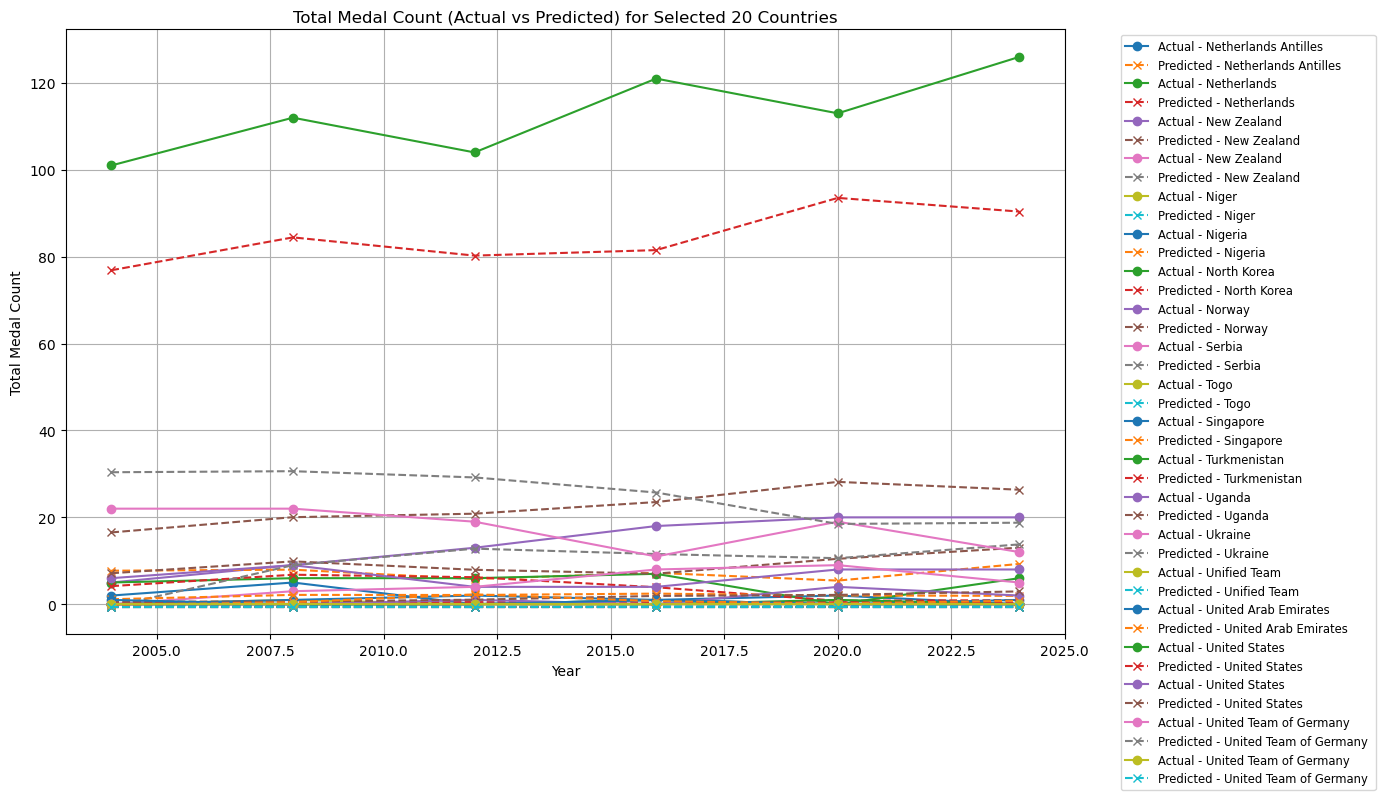

In [7]:
import matplotlib.pyplot as plt

# Ensure test_df has predictions and relevant columns
test_df['Predicted_Total_Medal_Count'] = y_pred

# Get the first 20 unique NOCs from the test set
selected_nocs = test_df['NOC'].unique()[:20]

# Create a figure
plt.figure(figsize=(14, 8))

# Loop through the selected NOCs and plot their data
for noc in selected_nocs:
    # Filter data for the current NOC
    actual_data = test_df[test_df['NOC'] == noc]

    # Plot actual Total Medal Count
    plt.plot(
        actual_data['Year'],
        actual_data['Total_Medal_Count'],
        marker='o',
        label=f'Actual - {noc}'
    )

    # Plot predicted Total Medal Count
    plt.plot(
        actual_data['Year'],
        actual_data['Predicted_Total_Medal_Count'],
        marker='x',
        linestyle='--',
        label=f'Predicted - {noc}'
    )

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Total Medal Count')
plt.title('Total Medal Count (Actual vs Predicted) for Selected 20 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # Place the legend outside the plot
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [8]:
# Calculate training predictions
y_train_pred = model.predict(X_train)

# Calculate training error
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate testing error
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Training MSE: {train_mse:.2f}, R²: {train_r2:.2f}")
print(f"Testing MSE: {test_mse:.2f}, R²: {test_r2:.2f}")


Training MSE: 48.68, R²: 0.62
Testing MSE: 36.72, R²: 0.79


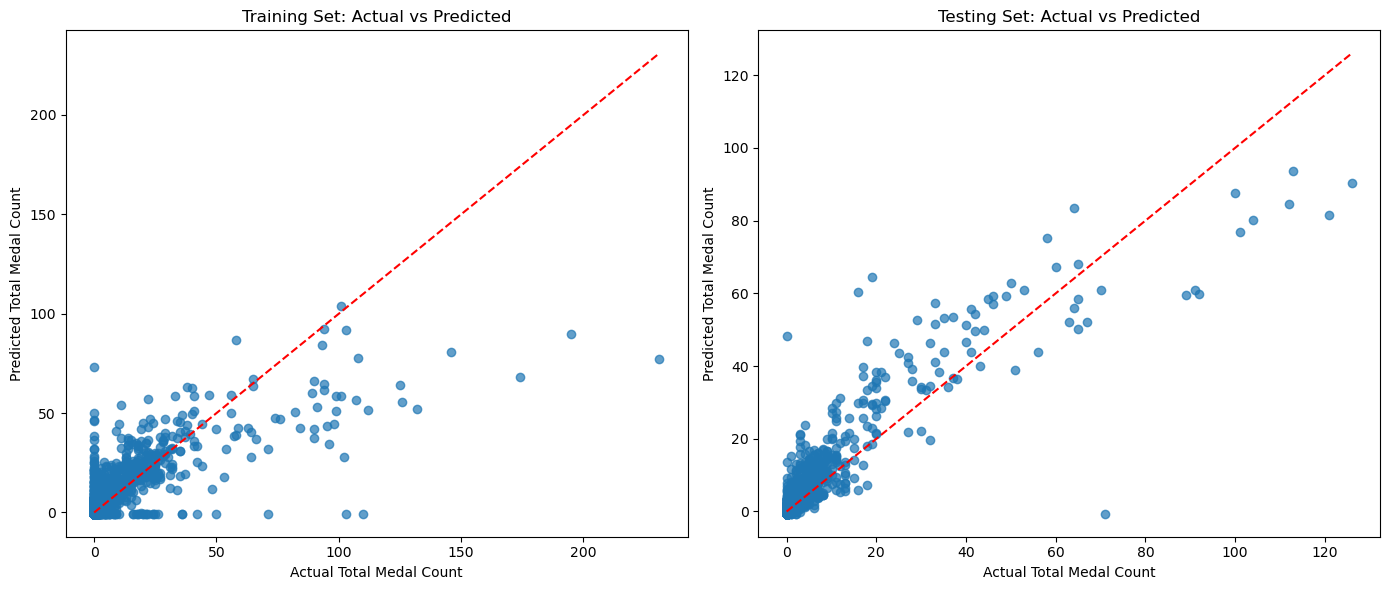

In [9]:
import matplotlib.pyplot as plt

# Training set predictions
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # Line of perfect prediction
plt.xlabel('Actual Total Medal Count')
plt.ylabel('Predicted Total Medal Count')
plt.title('Training Set: Actual vs Predicted')

# Testing set predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect prediction
plt.xlabel('Actual Total Medal Count')
plt.ylabel('Predicted Total Medal Count')
plt.title('Testing Set: Actual vs Predicted')

plt.tight_layout()
plt.show()
